In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rnacappredictor.predict_cap import predict_cap
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv(
    '../data/FM183_combined_bps/fingerprints.csv'
)
df = df[df['barcode_num'] <= 15]
df_test_bp_to_rt = {
    1: "INDURO",
    2: "ProtoScript",
    3: "Marathon",
    4: "GoScript",
    5: "EpiScript",
    # 6: "INDURO",
    # 7: "ProtoScript",
    # 8: "Marathon",
    # 9: "GoScript",
    # 10: "EpiScript",
    # 11: "INDURO",
    # 12: "ProtoScript",
    # 13: "Marathon",
    # 14: "GoScript",
    # 15: "EpiScript",
}
df['RT'] = df['barcode_num'].map(df_test_bp_to_rt)
df

,barcode,isoform,num_reads,num_A,num_C,num_G,num_T,num_DEL,num_INS,barcode_num,...,C%_INSDEL,G%_INSDEL,T%_INSDEL,INS%_INSDEL,DEL%_INSDEL,A%,C%,G%,T%,RT
0,barcode01,U1-83P,60,50,0,2,6,2,0,1,...,0.000000,0.033333,0.100000,0.000000,0.033333,0.862069,0.000000,0.034483,0.103448,INDURO
1,barcode01,VU1-19,0,0,0,0,0,0,0,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,INDURO
2,barcode01,VU1-14,1,0,0,1,0,0,0,1,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,INDURO
3,barcode01,U1-82P,57,24,7,12,4,4,6,1,...,0.122807,0.210526,0.070175,0.105263,0.070175,0.510638,0.148936,0.255319,0.085106,INDURO
4,barcode01,VU1-3,1,0,0,0,0,1,0,1,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,INDURO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,barcode05,U6,37605,22459,603,2298,558,1964,9723,5,...,0.016035,0.061109,0.014838,0.258556,0.052227,0.866541,0.023266,0.088664,0.021529,EpiScript
116,barcode05,U1-77P,6,4,0,0,2,0,0,5,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667,0.000000,0.000000,0.333333,EpiScript
117,barcode05,U1-85P,5,2,0,1,0,0,2,5,...,0.000000,0.200000,0.000000,0.400000,0.000000,0.666667,0.000000,0.333333,0.000000,EpiScript
118,barcode05,U1-42P,16,8,1,2,1,2,2,5,...,0.062500,0.125000,0.062500,0.125000,0.125000,0.666667,0.083333,0.166667,0.083333,EpiScript


/storage/brno2/home/romanb/software/miniconda3/envs/RNA/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


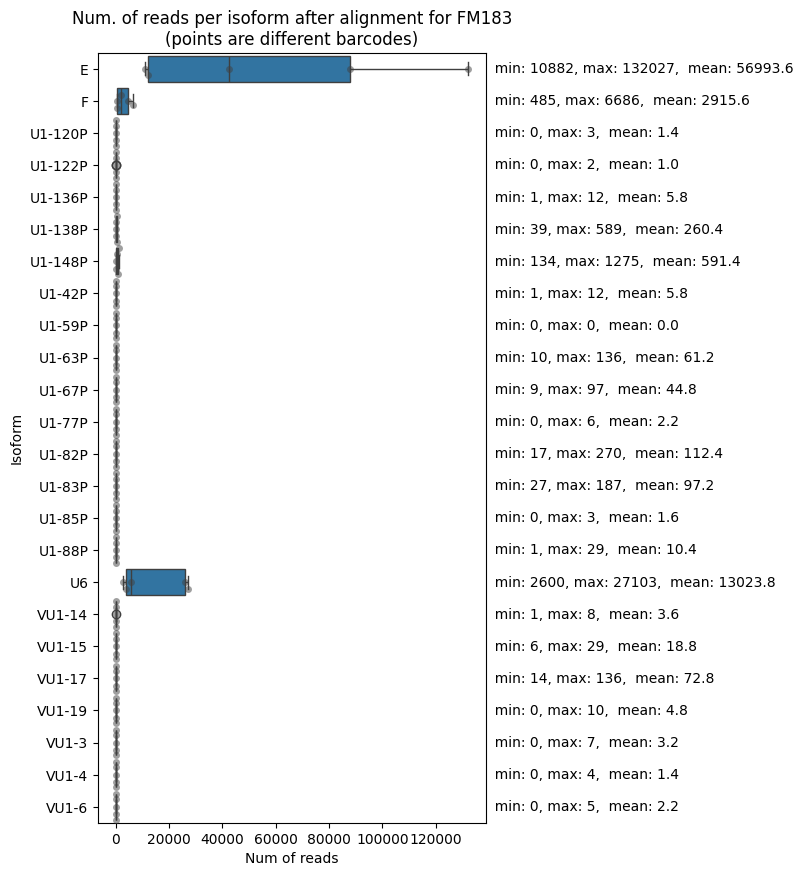

In [5]:
df = df.sort_values(by='isoform')

# Calculate stats per isoform
stats = df.groupby('isoform')['num_reads_ACGT'].agg(['min', 'max', 'mean']).round(1)

# Create the plot
fig, ax = plt.subplots(figsize=(5, 10))
sns.boxplot(y="isoform", x="num_reads_ACGT", data=df, ax=ax)
sns.swarmplot(y="isoform", x="num_reads_ACGT", data=df, color='0.25', alpha=0.5, ax=ax)

# Add stats annotations
for i, isoform in enumerate(df['isoform'].unique()):
    stats_text = f"min: {stats.loc[isoform, 'min']}, max: {stats.loc[isoform, 'max']},  mean: {stats.loc[isoform, 'mean']}"
    ax.text(ax.get_xlim()[1], i, f'  {stats_text}', va='center')

plt.title('Num. of reads per isoform after alignment for FM183\n(points are different barcodes)')
plt.xlabel('Num of reads')
plt.ylabel('Isoform')
plt.show()

In [6]:
df = df[df['num_reads_ACGT'] > 50]
df['cap'] = 'Unknown'
df['experiment'] = 'FM183_combined_bps_' + df['isoform']
df

,barcode,isoform,num_reads,num_A,num_C,num_G,num_T,num_DEL,num_INS,barcode_num,...,T%_INSDEL,INS%_INSDEL,DEL%_INSDEL,A%,C%,G%,T%,RT,cap,experiment
81,barcode04,E,23398,6279,1573,1484,1546,10221,2295,4,...,0.066074,0.098085,0.436832,0.577008,0.144551,0.136372,0.142069,GoScript,Unknown,FM183_combined_bps_E
5,barcode01,E,17033,6651,1134,3537,721,3831,1159,1,...,0.042330,0.068044,0.224916,0.552271,0.094163,0.293698,0.059869,INDURO,Unknown,FM183_combined_bps_E
112,barcode05,E,108701,74670,3300,6525,3155,9075,11976,5,...,0.029025,0.110174,0.083486,0.851911,0.037650,0.074444,0.035995,EpiScript,Unknown,FM183_combined_bps_E
54,barcode03,E,144792,113918,3792,9488,4829,6266,6499,3,...,0.033351,0.044885,0.043276,0.862839,0.028721,0.071864,0.036576,Marathon,Unknown,FM183_combined_bps_E
25,barcode02,E,59638,33472,2705,3548,2641,12672,4600,2,...,0.044284,0.077132,0.212482,0.790068,0.063848,0.083746,0.062338,ProtoScript,Unknown,FM183_combined_bps_E
51,barcode03,F,7311,5698,223,499,266,304,321,3,...,0.036384,0.043906,0.041581,0.852229,0.033353,0.074634,0.039785,Marathon,Unknown,FM183_combined_bps_F
113,barcode05,F,5649,3841,191,351,196,508,562,5,...,0.034696,0.099487,0.089927,0.838829,0.041712,0.076654,0.042804,EpiScript,Unknown,FM183_combined_bps_F
83,barcode04,F,1053,262,65,73,85,476,92,4,...,0.080722,0.087369,0.452042,0.540206,0.134021,0.150515,0.175258,GoScript,Unknown,FM183_combined_bps_F
32,barcode02,F,2953,1682,142,183,148,574,224,2,...,0.050119,0.075855,0.194379,0.780510,0.065893,0.084919,0.068677,ProtoScript,Unknown,FM183_combined_bps_F
13,barcode01,F,907,376,74,192,31,183,51,1,...,0.034179,0.056229,0.201764,0.558692,0.109955,0.285290,0.046062,INDURO,Unknown,FM183_combined_bps_F


In [16]:
df_train = pd.read_csv('../data/FM179-FM181_fingerprints.csv')
df_test = df
predict_cap(df_train, df_test)

Experiment: FM183_combined_bps_E
5 RTs considered for prediction(['GoScript', 'INDURO', 'EpiScript', 'Marathon', 'ProtoScript']) with mean number of reads 56993.6
Top-1 prediction: NAD-U1 (FM179_combined) with similarity 0.977
Top-2 prediction: NAD-U1 (FM180 + FM181) with similarity 0.973
Top-3 prediction: TMG-U1 (FM179_combined) with similarity 0.965
Top-4 prediction: TMG-U1 (FM180 + FM181) with similarity 0.958
Top-5 prediction: m⁷Gp₃A-U1 (FM179_combined) with similarity 0.909
Top-6 prediction: m⁷Gp₃A-U1 (FM180 + FM181) with similarity 0.833
Top-7 prediction: Ap₄A-U1 (FM179_combined) with similarity 0.788
Top-8 prediction: Ap₄A-U1 (FM180 + FM181) with similarity 0.724


Experiment: FM183_combined_bps_F
5 RTs considered for prediction(['Marathon', 'EpiScript', 'GoScript', 'ProtoScript', 'INDURO']) with mean number of reads 2915.6
Top-1 prediction: NAD-U1 (FM179_combined) with similarity 0.979
Top-2 prediction: NAD-U1 (FM180 + FM181) with similarity 0.976
Top-3 prediction: TMG-U1 (FM17